<center><h1>Finding best model and hyper parameter tunning using GridSearchCV</h1></center> 

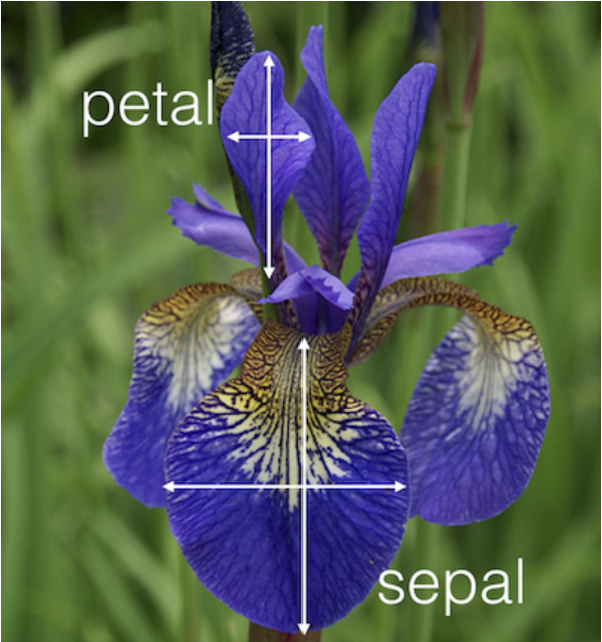

**Load iris flower dataset**

In [1]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
#The keys and their corresponding values
# for key, value in iris.items():
#     print(f"{key}:\n{value}\n")

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


# Approach 1: Use train_test_split and manually tune parameters by trial and error

The random selection of training and testing data changes every time the cells below are run

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [10]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9555555555555556

# Approach 2: Use K Fold Cross validation

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [15]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [16]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [18]:
import numpy as np
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf = GridSearchCV(svm.SVC(gamma = 'auto'), 
                  {
                      'C': [1,10,20],
                      'kernel': ['rbf', 'linear']
                  }, cv = 5, return_train_score = False)

clf.fit (iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.        , 0.001089  , 0.        , 0.        , 0.00030756,
        0.        ]),
 'std_fit_time': array([0.        , 0.002178  , 0.        , 0.        , 0.00061512,
        0.        ]),
 'mean_score_time': array([0.00233293, 0.        , 0.00187621, 0.00160737, 0.00138907,
        0.        ]),
 'std_score_time': array([0.00350025, 0.        , 0.00312421, 0.00321474, 0.00170177,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [21]:
df_results = pd.DataFrame (clf.cv_results_)

In [23]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.002333,0.003500,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001089,0.002178,0.000000,0.000000,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000000,0.000000,0.001876,0.003124,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000000,0.000000,0.001607,0.003215,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000308,0.000615,0.001389,0.001702,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000000,0.000000,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [24]:
df_results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [25]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

In [27]:
print(clf.best_estimator_)

SVC(C=1, gamma='auto')


In [28]:
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [29]:
print(clf.best_score_)

0.9800000000000001


In [33]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=5
)
rs.fit(iris.data, iris.target)
df_results2 = pd.DataFrame (rs.cv_results_)
df_results2[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.973333
1,20,linear,0.966667
2,10,rbf,0.980000
3,20,rbf,0.966667
4,1,linear,0.980000


# Finding the best model

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
        })
    
df_best_model= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_best_model

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


**Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem: iris flower classification**